# Innovate Data Academy
[Krisolis](http://www.krisolis.ie)

## Workshop 1 Simple Predictive Models In Python
## SOLUTIONS

In [21]:
# General data handling
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000) 
pd.set_option('display.max_colwidth', 200)
import numpy as np

# Drawing plots
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 
# Machine learning with scikit-learn
import sklearn
import sklearn.impute
import sklearn.model_selection
import sklearn.metrics
import sklearn.tree

### Introduction
Credit scoring is one of the most established uses of machine learning and predictive modeling in finance. By recognizing the patterns that precede borrowers running into financial distress banks can take action to avoid negative impacts of this. In this workshop you will use a dataset of past borrowers to build a model that predicts the likelihood that a borrower will experience financial distress in the next two years.

The descriptive features available to describe borrowers are:

- **Age**:	The age of borrower in years.
- **CustomerLifeTime**: How long the borrower has been a customer of the bank. 
- **MonthlyIncome**: The borrower's Monthly gross income.
- **NumberOfDependents**: Number of dependents (e.g. spouse or children) in the borrower's family (excluding themselves)
- **NumberOfTime30_59DaysLateNotWorse**: Number of times borrower has previously been 30-59 days past due, but no worse, in the last 2 years.
- **NumberOfTime60_89DaysLateNotWorse**: Number of times borrower has previously been 60-89 days past due, but no worse, in the last 2 years.
- **NumberOfTimes90DaysLate**: The number of times the borrower has previously been 90 days or more past due.
- **DebtRatio**: Monthly debt payments plus other living expenses paid by the borrower, divided by their monthly gross income.
- **NumberOfOpenCreditLinesAndLoans**: The number of existing loans (e.g. car loans or mortgages) and other lines of credit (e.g. credit cards) that the borrower currently holds. 
- **NumberRealEstateLoansOrLines**: Number of mortgage and other real estate loans held by the borrower.
- **UtilizationOfUnsecuredLinesTotal**: Total balance the borrower owes on credit cards and other short term loans, divided by the sum of their credit limits.

The target feature to predict is: 

- **SeriousDlqin2yrs**:	The borrower experienced 90 days past due delinquency or worse in the following 2 years (0 = No, 1 = Yes)


### Task 1
Load the dataset from the file **credit_scoring_bal.csv** into a Python data frame called `dataset`. View its shape, the column headings, and the first and last few rows. 

In [22]:
target_feature_name = 'SeriousDlqin2yrs'
dataset = pd.read_csv('../data/credit_scoring_bal.csv')
print(dataset.shape)
print(dataset.columns.to_list())
display(dataset.head())
display(dataset.tail())

(20052, 12)
['UtilizationOfUnsecuredLinesTotal', 'Age', 'CustomerLifeTime', 'NumberOfTime30_59DaysLateNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents', 'SeriousDlqin2yrs']


,UtilizationOfUnsecuredLinesTotal,Age,CustomerLifeTime,NumberOfTime30_59DaysLateNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.044497,46,10,0,0.404332,3600.0,7,0,1,0,4,No
1,0.598917,48,17,0,0.551596,8585.0,13,0,4,0,5,No
2,0.391372,50,13,0,0.079297,11500.0,10,0,0,0,1,No
3,0.000000,53,15,0,0.214541,7000.0,10,0,1,0,1,No
4,0.766382,35,5,0,0.087977,5114.0,4,2,0,0,0,No


,UtilizationOfUnsecuredLinesTotal,Age,CustomerLifeTime,NumberOfTime30_59DaysLateNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
20047,1.000000,46,9,0,170.398010,401.0,3,2,0,0,2,Yes
20048,1.135552,41,11,2,0.845887,7500.0,12,0,4,1,0,Yes
20049,0.920107,31,4,1,0.176732,1125.0,4,1,0,0,0,Yes
20050,0.983825,55,17,0,0.064116,4600.0,2,1,0,0,6,Yes
20051,0.224711,55,15,0,0.057235,8700.0,7,0,0,0,0,Yes


### Task 2
Extract the descriptive features into a DataFrame named `X` and the target feature into a Series named `y`.

In [23]:
X = dataset.loc[:, dataset.columns != target_feature_name]
y = dataset[target_feature_name]

Examine the shape, column headings, and the first and last few rows for `X` and `y` (note `y` will not have column names).

In [24]:
print(X.shape)
print(X.columns.to_list())
display(X.head())
display(X.tail())

(20052, 11)
['UtilizationOfUnsecuredLinesTotal', 'Age', 'CustomerLifeTime', 'NumberOfTime30_59DaysLateNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


,UtilizationOfUnsecuredLinesTotal,Age,CustomerLifeTime,NumberOfTime30_59DaysLateNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.044497,46,10,0,0.404332,3600.0,7,0,1,0,4
1,0.598917,48,17,0,0.551596,8585.0,13,0,4,0,5
2,0.391372,50,13,0,0.079297,11500.0,10,0,0,0,1
3,0.000000,53,15,0,0.214541,7000.0,10,0,1,0,1
4,0.766382,35,5,0,0.087977,5114.0,4,2,0,0,0


,UtilizationOfUnsecuredLinesTotal,Age,CustomerLifeTime,NumberOfTime30_59DaysLateNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
20047,1.000000,46,9,0,170.398010,401.0,3,2,0,0,2
20048,1.135552,41,11,2,0.845887,7500.0,12,0,4,1,0
20049,0.920107,31,4,1,0.176732,1125.0,4,1,0,0,0
20050,0.983825,55,17,0,0.064116,4600.0,2,1,0,0,6
20051,0.224711,55,15,0,0.057235,8700.0,7,0,0,0,0


In [25]:
print(y.shape)
display(y.head())
display(y.tail())

(20052,)


0    No
1    No
2    No
3    No
4    No
Name: SeriousDlqin2yrs, dtype: object

20047    Yes
20048    Yes
20049    Yes
20050    Yes
20051    Yes
Name: SeriousDlqin2yrs, dtype: object

### Task 3 
Divide the available dataset into a training partition (70%) - `X_train` and `y_train` - and a validation partition (30%)  - `X_valid` and `y_valid`.

In [26]:
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X, y, 
                                                                              train_size = 0.7,
                                                                              stratify = y)

### Task 4

Create a decision tree classifier object using '*entropy*' as the splitting `criterion` and all other default hyper-parameters.

In [27]:
model_clf = sklearn.tree.DecisionTreeClassifier(criterion = 'entropy')

Train the decision tree classifier using its `fit` function with the data in `X_train` and `y_train`.

In [28]:
model_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

Print a representation of the decision tree - what feature was chosen to be examined at the root node? 

In [29]:
print(sklearn.tree.export_text(model_clf, 
                               feature_names=X_train.columns.to_list()))

|--- UtilizationOfUnsecuredLinesTotal <= 0.50
|   |--- NumberOfTime30_59DaysLateNotWorse <= 0.50
|   |   |--- NumberOfTimes90DaysLate <= 0.50
|   |   |   |--- UtilizationOfUnsecuredLinesTotal <= 0.14
|   |   |   |   |--- NumberOfTime60-89DaysPastDueNotWorse <= 0.50
|   |   |   |   |   |--- Age <= 59.50
|   |   |   |   |   |   |--- NumberRealEstateLoansOrLines <= 4.50
|   |   |   |   |   |   |   |--- Age <= 39.50
|   |   |   |   |   |   |   |   |--- NumberOfDependents <= 0.50
|   |   |   |   |   |   |   |   |   |--- MonthlyIncome <= 2972.50
|   |   |   |   |   |   |   |   |   |   |--- Age <= 35.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 14
|   |   |   |   |   |   |   |   |   |   |--- Age >  35.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- MonthlyIncome >  2972.50
|   |   |   |   |   |   |   |   |   |   |--- DebtRatio <= 3695.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of 

Draw the decision tree - **WATCH OUT!** this tree is most likely very big and will take a long time to draw.

In [30]:
#fig = plt.figure(figsize=(10,10))
#_ = sklearn.tree.plot_tree(model_clf, 
#                           feature_names = X_train.columns,
#                           class_names = model_clf.classes_,
#                           filled = True)

### Task 5
Make predictions for each of the instances in the **training dataset** and assess the performance of the trained decision tree based on these predictions using **accuracy**. 

In [31]:
y_pred = model_clf.predict(X_train)
accuracy = sklearn.metrics.accuracy_score(y_train, y_pred)
print("Accuracy (training set): {}".format(accuracy))

Accuracy (training set): 0.999643773154745


Make predictions for each of the instances in the **validation dataset** and assess the performance of the trained decision tree based on these predictions using **accuracy**. 

In [32]:
y_pred = model_clf.predict(X_valid)
accuracy = sklearn.metrics.accuracy_score(y_valid, y_pred)
print("Accuracy (training set): {}".format(accuracy))

Accuracy (training set): 0.7027925531914894


What might explain the difference between these performance scores? 

In [33]:
# The descision trained with default parmaters massively overfitted to the training dataset. 
# So it perform swell on this data but cannot generalise well to other data - like the data 
# in the validation set. 

### Task 6
Train a more effective decision tree by setting the `min_samples_leaf` hyper parameter to 0.05.

In [34]:
model_clf = sklearn.tree.DecisionTreeClassifier(
                                             min_samples_leaf=0.05)
model_clf.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=0.05)

Print a representation of the decision tree - what feature was chosen to be examined at the root node? 

In [35]:
print(sklearn.tree.export_text(model_clf, 
                               feature_names=X_train.columns.to_list()))

|--- UtilizationOfUnsecuredLinesTotal <= 0.50
|   |--- NumberOfTime30_59DaysLateNotWorse <= 0.50
|   |   |--- UtilizationOfUnsecuredLinesTotal <= 0.14
|   |   |   |--- Age <= 42.50
|   |   |   |   |--- class: No
|   |   |   |--- Age >  42.50
|   |   |   |   |--- NumberRealEstateLoansOrLines <= 1.50
|   |   |   |   |   |--- Age <= 59.50
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Age >  59.50
|   |   |   |   |   |   |--- class: No
|   |   |   |   |--- NumberRealEstateLoansOrLines >  1.50
|   |   |   |   |   |--- class: No
|   |   |--- UtilizationOfUnsecuredLinesTotal >  0.14
|   |   |   |--- Age <= 54.50
|   |   |   |   |--- class: No
|   |   |   |--- Age >  54.50
|   |   |   |   |--- class: No
|   |--- NumberOfTime30_59DaysLateNotWorse >  0.50
|   |   |--- class: Yes
|--- UtilizationOfUnsecuredLinesTotal >  0.50
|   |--- NumberOfTimes90DaysLate <= 0.50
|   |   |--- NumberOfTime30_59DaysLateNotWorse <= 0.50
|   |   |   |--- Age <= 52.50
|   |   |   |   |--- Utilizati

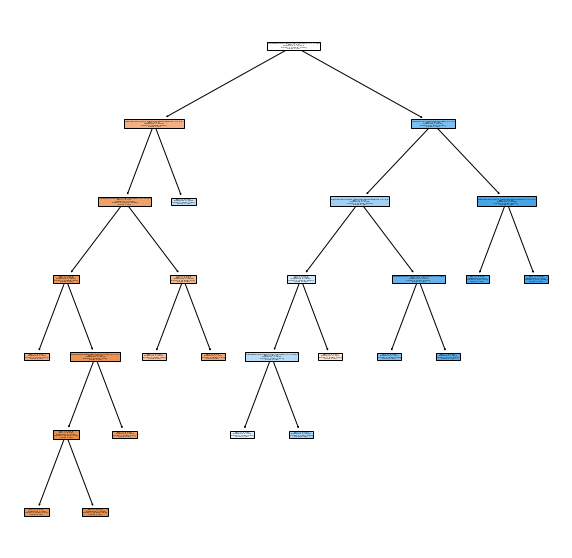

In [36]:
fig = plt.figure(figsize=(10,10))
_ = sklearn.tree.plot_tree(model_clf, 
                           feature_names = X_train.columns,
                           class_names = model_clf.classes_,
                           filled = True)

Repeat the previous evaluation on the training and validation datasets.

In [37]:
y_pred = model_clf.predict(X_train)
accuracy = sklearn.metrics.accuracy_score(y_train, y_pred)
print("Accuracy (training set): {}".format(accuracy))

Accuracy (training set): 0.7588344257623254


In [38]:
y_pred = model_clf.predict(X_valid)
accuracy = sklearn.metrics.accuracy_score(y_valid, y_pred)
print("Accuracy (training set): {}".format(accuracy))

Accuracy (training set): 0.758311170212766


### Task 7
The file **credit_scoring_query.csv** contains a set of query instances for which predictions need to be made. Load this file into a DataFrame named `X_query`.

In [39]:
X_query = pd.read_csv('../data/credit_scoring_query.csv')
print(X_query.shape)
print(X_query.columns.to_list())
display(X_query.head())
display(X_query.tail())

(10000, 11)
['UtilizationOfUnsecuredLinesTotal', 'Age', 'CustomerLifeTime', 'NumberOfTime30_59DaysLateNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


,UtilizationOfUnsecuredLinesTotal,Age,CustomerLifeTime,NumberOfTime30_59DaysLateNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.141966,64,24,0,0.945604,3400,19,0,2,0,0
1,0.873851,60,19,0,0.442941,3916,5,0,0,0,0
2,0.000000,54,20,1,0.086192,6821,8,0,0,0,1
3,0.006997,40,10,3,0.459021,6600,9,1,2,2,0
4,1.002005,50,13,0,0.419847,1440,7,0,0,0,1


,UtilizationOfUnsecuredLinesTotal,Age,CustomerLifeTime,NumberOfTime30_59DaysLateNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
9995,0.901613,48,13,0,0.318455,12500,3,0,1,0,5
9996,0.252228,52,20,2,0.364444,8667,21,0,2,1,0
9997,0.477882,36,6,0,0.352941,6000,11,0,1,0,0
9998,0.912544,21,0,0,0.062280,850,2,0,0,0,0
9999,0.000000,42,12,0,0.229528,2478,10,0,0,0,0


Use the model trained to make a set of predictions for the instances in `X_query`.

In [40]:
y_pred = model_clf.predict(X_query)

Examine the predictions made using the model. 

In [41]:
predictions = pd.DataFrame({'prediction' : y_pred})
print(predictions.head())

  prediction
0         No
1         No
2        Yes
3        Yes
4        Yes


In [42]:
predictions.value_counts()

prediction
No            6879
Yes           3121
dtype: int64